## Assignment 2

## Group members : 
1. Laxman Pangeni - 2020sc04894
2. Chaitanya Bangale - 2020sc04084
3. Manish Sharma - 2020sc04908

## Group No: 108 
            
### Name of Data Set: Diabetes.csv

## * Importing Libraries/Dataset

In [1]:
# Importing general libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Importing Chi-Square test library
from scipy.stats import chi2_contingency

# Importing model related libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.display import display, HTML

In [2]:
file = "diabetes.csv"
data_raw = pd.read_csv(file)

## * Data Visualization and Exploration

In [3]:
# Printing the random 10 rows for sanity check to identify all the features present in the dataset and 
# if the target matches with them.
display(HTML('<b>Table 1: Displaying 10 random rows</b>'))
data_raw.sample(10, random_state=9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
456,1,135,54,0,0,26.7,0.687,62,0
260,3,191,68,15,130,30.9,0.299,34,0
651,1,117,60,23,106,33.8,0.466,27,0
143,10,108,66,0,0,32.4,0.272,42,1
666,4,145,82,18,0,32.5,0.235,70,1
390,1,100,66,29,196,32.0,0.444,42,0
591,2,112,78,50,140,39.4,0.175,24,0
77,5,95,72,33,0,37.7,0.370,27,0
414,0,138,60,35,167,34.6,0.534,21,1
494,3,80,0,0,0,0.0,0.174,22,0


In [4]:
# Printing the shape of the dataset to understand the data dimension.
data_raw.shape

(768, 9)

#### Observations:
1. The evaluation so far highlights that the dataset has 9 variables (including class) with 768 entries in each columns. The class has binary, 0 and 1, labels. The task thus is to make a classification model that predicts the risk of diabetes based on some medical parameters.

In [5]:
# Printing the data info to identify the data type and to know if there are any missing values in the dataset.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Creating summary statistics - Continuous feaatures
display(HTML('<b>Table 2: Summary statistics - continuous features</b>'))
data_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observations:-
1. The "pregnancies" feature [Table 2] seems to be the correct data with the number of pregnancies from 0 till 17.
2. The "Age" feature [Table 2] seems to be the correct data with min range from 21 and max range to 81.
3. "Glucose", "BloodPressure", "SkinThickness", "Insulin" and "BMI" with min 0 values seem to be wrong entry since 0 value for these features are not possible. We will convert the 0 to "NAN" and deal with NAN values through imputation techniques later.

In [7]:
data_raw[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_raw[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

0    500
1    268
Name: Outcome, dtype: int64


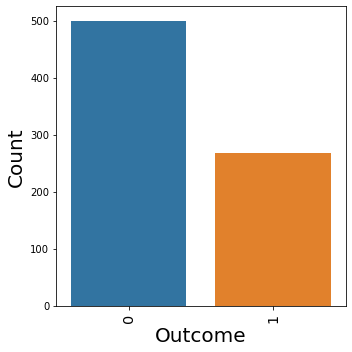

In [8]:
# Counting the entries for each categorical variables and understanding the distribution.
display(HTML('<b>Figure 1: "Outcome" class distribution</b>'))
plt.figure(figsize=(5,5), facecolor="white")
sns.countplot(data_raw["Outcome"])
plt.xlabel("Outcome",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90,
           horizontalalignment='center',
           fontweight='light',
           fontsize='x-large')
plt.tight_layout()

print(data_raw["Outcome"].value_counts())

#### Observations:-
1. The two labels for "Outcome" class, which is of our interest, has more entries to 0 (500 or 65 %) than to 1 (268 or 35 %). We need to deal with this imbalanced dataset separately later. Also since it is a medical problem, we are more interested to understand the predictabilit of risk of diabetes than no risk.

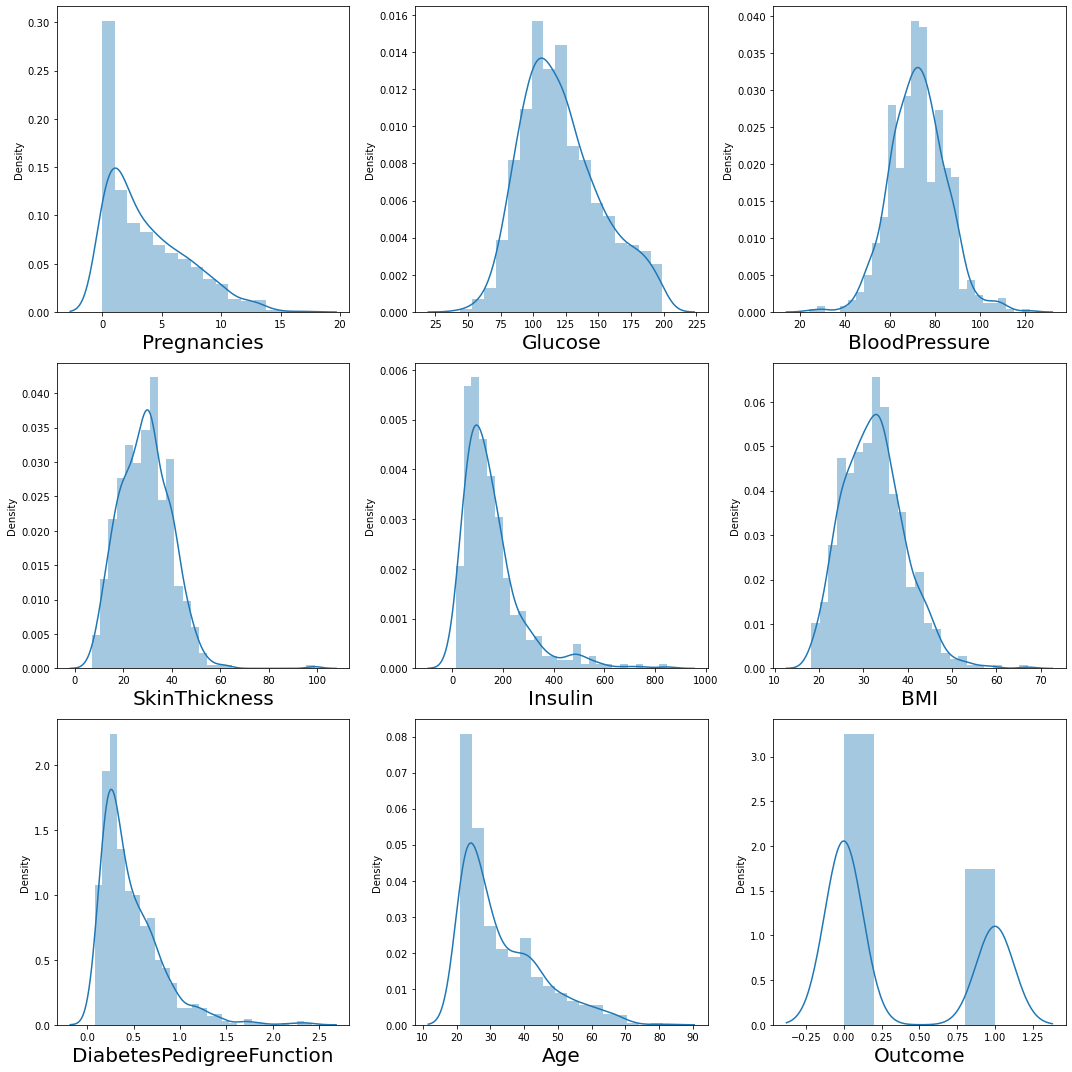

In [9]:
# Plotting the distribution for the continuous variable to understand the distribution.
display(HTML('<b>Figure 2: Distribution of each continuous features</b>'))
plt.figure(figsize=(15,15), facecolor="white")
plotnumber=1
for col in data_raw:
    if data_raw[col].dtype != "object":
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_raw[col])
        plt.xlabel(col,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [10]:
# Skewnewss check
display(HTML('<b>Table 3: Skewness information for each continuous features</b>'))
print(data_raw.skew().sort_values(ascending = False))

Insulin                     2.166464
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
SkinThickness               0.690619
Outcome                     0.635017
BMI                         0.593970
Glucose                     0.530989
BloodPressure               0.134153
dtype: float64


##### Observations:-
1. The "age" features shows that the more people are aged between 20 to 40 age group. 
2. For "Insulin", "DiabetesPedigreeFunction" and "Age", the skewness is greater than 1 but not significantly higher, thus log-transformation methodology will be tried to reduce the skewness.
3. Inline to Table 2 observations, we will use the following imputation techniques to replace "NAN" values -
    a. Mean imputation technique for "Glucose" , "BloodPressure" and "BMI" because these features are normally distributed.
    b. Median imputation technique "SkinThickness" and "Insulin" because the distribution of these features are skewed.

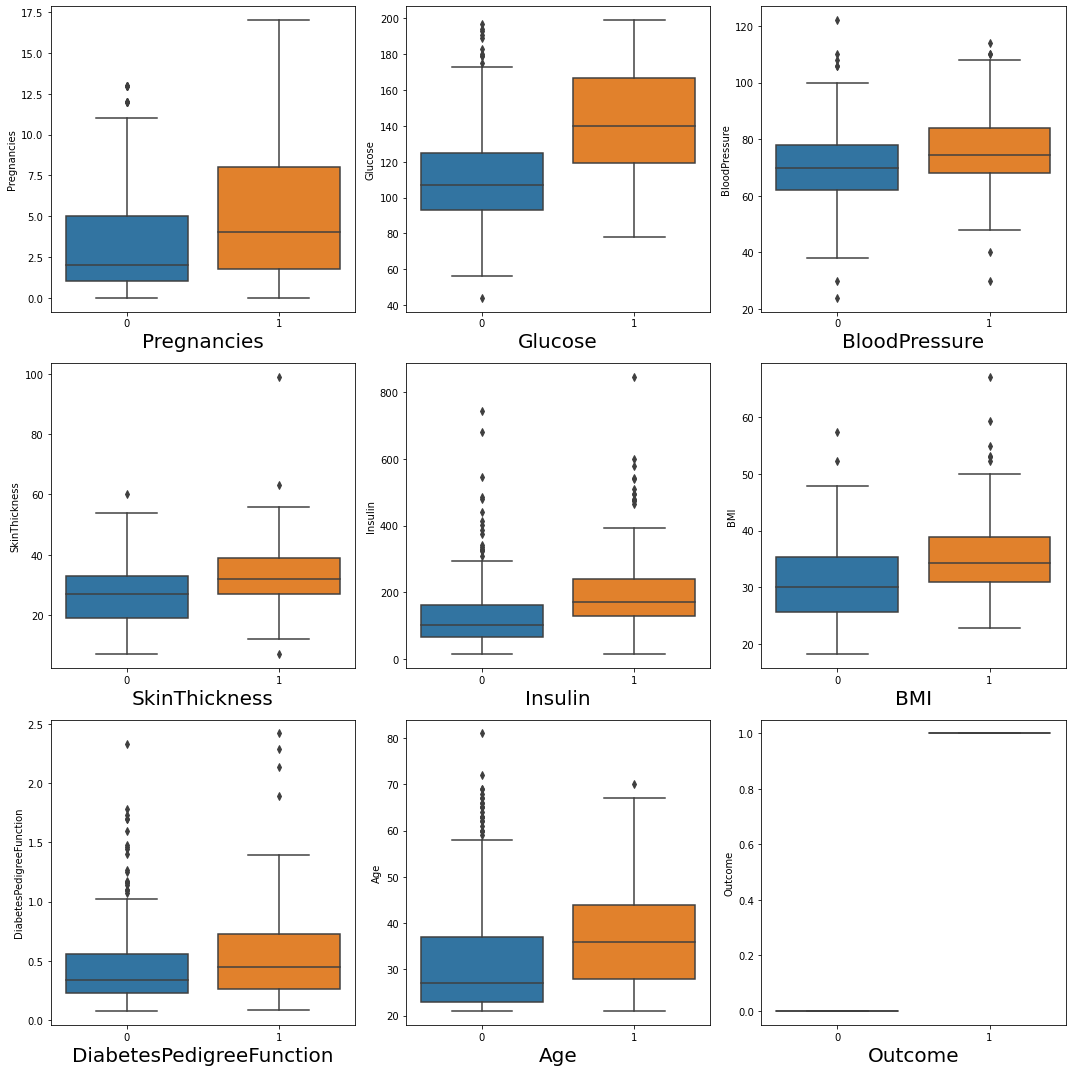

In [11]:
# Plotting the distribution for the continuous variable to understand the distribution.
display(HTML('<b>Figure 3: Distribution of each continuous features against class labels</b>'))
plt.figure(figsize=(15,15), facecolor="white")
plotnumber=1
for col in data_raw:
    if data_raw[col].dtype != "object":
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data_raw['Outcome'], y=data_raw[col])
        plt.xlabel(col,fontsize=20)
        plotnumber+=1
plt.tight_layout()

#### Observations:-
1. Women with higher pregnancy counts are more likely to be at higher risk of diabetes.
2. People with higher plasma glucose concentration (at 2 hours in an oral glucose tolerance test) are more likely to have diabetes.
3. Skin thickness, blood pressure, insulin, BMI and diabetes pedigree function have slight impact on diabetes risk.
4. People of higher age are likely to have diabetes.

## * Data Pre-processing and cleaning

In [12]:
# We will use the different imputation technique [Table 3 observations] to replace "0 replaced NAN" values.
data_transform1 = data_raw.copy(deep = True)
data_transform1['Glucose'].fillna(data_transform1['Glucose'].mean(), inplace = True)
data_transform1['BloodPressure'].fillna(data_transform1['BloodPressure'].mean(), inplace = True)
data_transform1['SkinThickness'].fillna(data_transform1['SkinThickness'].median(), inplace = True)
data_transform1['Insulin'].fillna(data_transform1['Insulin'].median(), inplace = True)
data_transform1['BMI'].fillna(data_transform1['BMI'].mean(), inplace = True)

The skewness information after transformation:
Age                         0.601746
DiabetesPedigreeFunction    0.114178
Insulin                    -0.218654
dtype: float64


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5, 0, 'After transformation')

<Figure size 432x288 with 0 Axes>

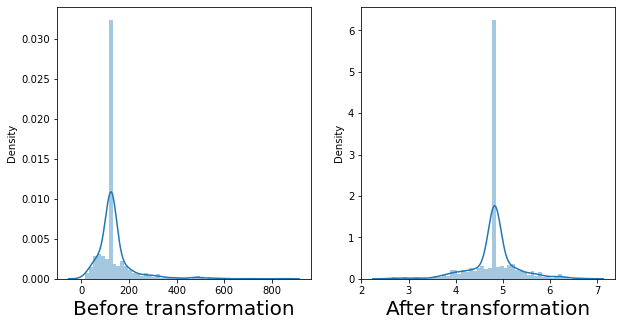

<Figure size 432x288 with 0 Axes>

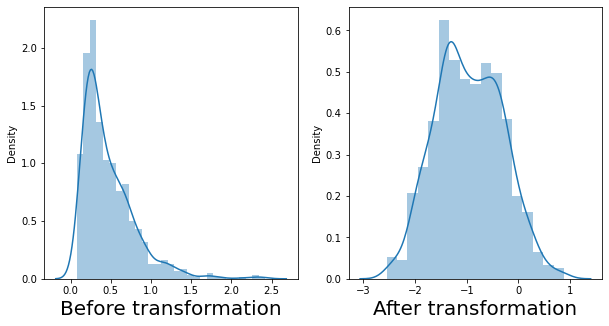

<Figure size 432x288 with 0 Axes>

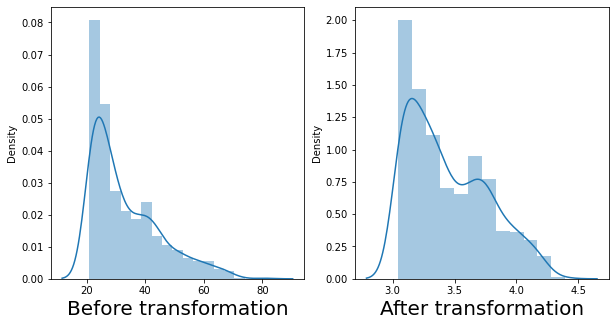

In [13]:
# Working on the skewness of the "Insulin", "DiabetesPedigreeFunction" and "Age"  through log transformation.
data_transform2 = data_transform1.copy(deep = True)

data_transform2.Insulin = data_transform2.Insulin.map(lambda x: np.log(x))
data_transform2.DiabetesPedigreeFunction = data_transform2.DiabetesPedigreeFunction.map(lambda x: np.log(x))
data_transform2.Age = data_transform2.Age.map(lambda x: np.log(x))


print("The skewness information after transformation:")
print(data_transform2[["Insulin", "DiabetesPedigreeFunction", "Age"]].skew().sort_values(ascending = False))

# Check before and after distribution of the attributes.
display(HTML('<b>Figure 4: Skewness of the features before and after the transformation</b>'))
plt.figure(facecolor="white")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.subplot(1,2,1)
print(sns.distplot(data_transform1.Insulin))
plt.xlabel("Before transformation",fontsize=20)
ax = plt.subplot(1,2,2)
print(sns.distplot(data_transform2.Insulin))
plt.xlabel("After transformation",fontsize=20)

plt.figure(facecolor="white")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.subplot(1,2,1)
print(sns.distplot(data_transform1.DiabetesPedigreeFunction))
plt.xlabel("Before transformation",fontsize=20)
ax = plt.subplot(1,2,2)
print(sns.distplot(data_transform2.DiabetesPedigreeFunction))
plt.xlabel("After transformation",fontsize=20)

plt.figure(facecolor="white")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.subplot(1,2,1)
print(sns.distplot(data_transform1.Age))
plt.xlabel("Before transformation",fontsize=20)
ax = plt.subplot(1,2,2)
print(sns.distplot(data_transform2.Age))
plt.xlabel("After transformation",fontsize=20)

##### Observations:-
1. After log-transformation, the skewness has significantly reduced below 1 which is an acceptable range.

Text(0.5, 1.0, 'Pearson Correlation')

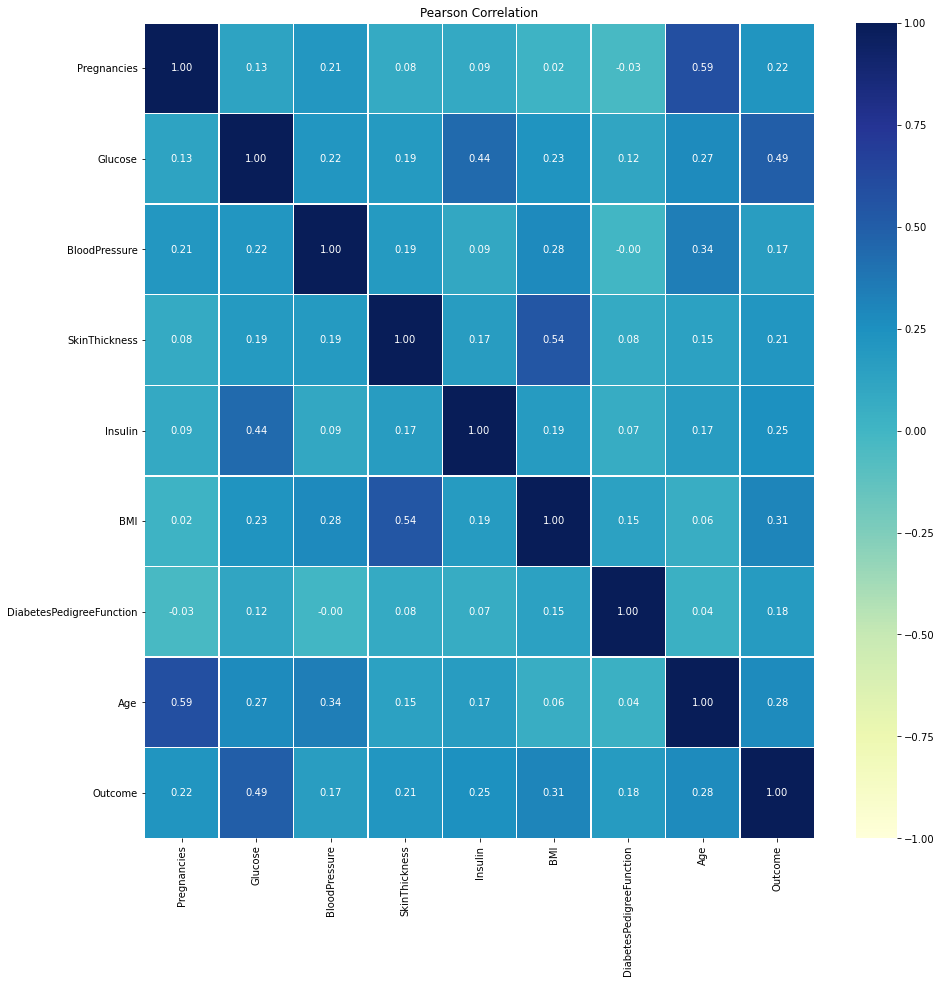

In [14]:
# Correlation
display(HTML('<b>Figure 5: Pearson Correlation Matrix</b>'))
corr_matrix = data_transform2.copy(deep=True)
plt.figure(figsize=(15, 15), facecolor="white")
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation")

#### Observations:-
1. From the correlation map above, it seems that the "Age" & "Pregnancies", "Glucose" & "Insulin", "Glucose" & "Outcome", "SkinThickness" & "BMI" are positively correlated but not significant. This shows that the features are good to be considered as a final feature.

In [15]:
data_transform2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## * Data Preparation

In [16]:
# In order to have more stable and accurate model-generation, it is important to scale the variables in order to make 
# the problem easier to learn.

data_transform3 = data_transform2.copy(deep = True)

scaler = MinMaxScaler(feature_range = (0, 1))

data_transform3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]] = scaler.fit_transform(data_transform2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]])

In [17]:
display(HTML('<b>Table 4: 10 random readings of the continuous features after min-max normalization</b>'))
data_transform3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]].sample(10, random_state=19)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
693,0.411765,0.548387,0.448980,0.456522,0.533775,0.415133,0.503023,0.530901
624,0.117647,0.412903,0.408163,0.239130,0.533775,0.257669,0.205509,0.000000
711,0.294118,0.529032,0.551020,0.217391,0.110201,0.233129,0.503023,0.477327
485,0.000000,0.587097,0.448980,0.380435,0.702775,0.492843,0.449279,0.098918
717,0.588235,0.322581,0.489796,0.119565,0.533775,0.100204,0.591547,0.726580
261,0.176471,0.625806,0.493930,0.239130,0.533775,0.241309,0.663187,0.186169
738,0.117647,0.354839,0.367347,0.108696,0.593963,0.376278,0.512163,0.000000
684,0.294118,0.593548,0.591837,0.239130,0.533775,0.291564,0.612772,0.881221
152,0.529412,0.722581,0.632653,0.228261,0.586222,0.329243,0.793102,0.513470
213,0.000000,0.619355,0.418367,0.206522,0.543337,0.498978,0.497669,0.098918


In [18]:
# Get only the columns containing features that is all columns from "Pregnancies" to "DiabetesPedigreeFunction"
# This range contains all the features but not the target
features = data_transform3.drop(["Outcome"], axis = 1)

# extract NumPy arrays
X = features.values
y = data_transform3["Outcome"].values
print(f"X.shape: {X.shape}  y.shape: {y.shape}")

X.shape: (768, 8)  y.shape: (768,)


In [19]:
# Split-out test train data
# Because of the imbalanced response level, we will use stratified sampling technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29, stratify=y)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

## * Model Building

In [21]:
# Spot Checking the performance of three algorithms - Naive Bayes, Logistic Regression and Decision Tree 
models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                                              max_depth = None, min_samples_split = 2, min_samples_leaf = 1)))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5, weights = "uniform", algorithm = "auto",
                                leaf_size = 30, p = 2, metric = "minkowski")))

# Evaluate each model in turn
results_accuracy = []
results_loss = []
names = []
display(HTML('<b>Table 5: Model accuracy range for different models</b>'))
for name, model in models:
    rskf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 39)
    cv_results_accuracy = cross_val_score(model, X_train, y_train, cv = rskf, scoring = "accuracy")
    cv_results_loss = cross_val_score(model, X_train, y_train, cv = rskf, scoring = "neg_log_loss")
    results_accuracy.append(cv_results_accuracy)
    results_loss.append(cv_results_loss)
    names.append(name)
    print("Min accuracy possible: %s %f Max accuracy posssible: %f" % (name, round(cv_results_accuracy.min(),2)*100, 
                                                                       round(cv_results_accuracy.max(),2)*100))
    print("Accuracy mean (StdDev): %f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std()))
    print("Min log-loss possible: %s %f Max log-loss posssible: %f" % (name, round(cv_results_loss.min(),2)*100, 
                                                                       round(cv_results_loss.max(),2)*100))
    print("Log-loss mean (StdDev): %f (%f)" % (cv_results_loss.mean(), cv_results_loss.std()))

Min accuracy possible: LR 65.000000 Max accuracy posssible: 87.000000
Accuracy mean (StdDev): 0.760217 (0.055033)
Min log-loss possible: LR -58.000000 Max log-loss posssible: -37.000000
Log-loss mean (StdDev): -0.476625 (0.050483)
Min accuracy possible: DT 56.000000 Max accuracy posssible: 85.000000
Accuracy mean (StdDev): 0.693110 (0.060804)
Min log-loss possible: DT -1535.000000 Max log-loss posssible: -512.000000
Log-loss mean (StdDev): -10.532644 (2.277492)
Min accuracy possible: KNN 62.000000 Max accuracy posssible: 87.000000
Accuracy mean (StdDev): 0.746702 (0.059261)
Min log-loss possible: KNN -301.000000 Max log-loss posssible: -39.000000
Log-loss mean (StdDev): -1.443002 (0.687330)


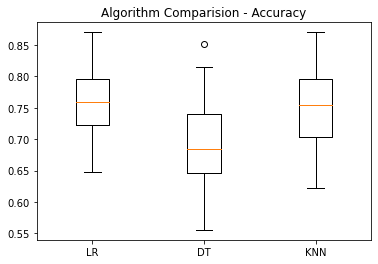

In [22]:
display(HTML('<b>Figure 6: Diferent model accuracy distribution</b>'))
plt.boxplot(results_accuracy, labels = names, notch = False, vert = True, whis = True)
plt.title("Algorithm Comparision - Accuracy")
plt.show()

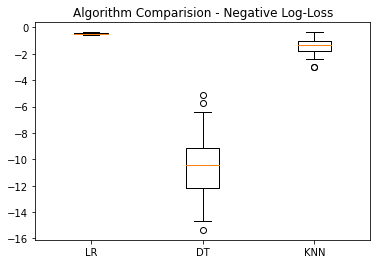

In [23]:
# log-loss is an implementation of the error metric which is as most error metrics a positive number. 
# In this case, it is a metric which is generally minimized (e.g. as mean squared error for regression)
# in contrast to metrics such as accuracy which is maximized.
# The negative log-loss is a technicality to create a utility value, which allows optimizing functions and classes to maximize
# this utility without having to change the function's behavior for each metric.

display(HTML('<b>Figure 7: Diferent model negative log-loss distribution</b>'))
plt.boxplot(results_loss, labels = names, notch = False, vert = True, whis = True)
plt.title("Algorithm Comparision - Negative Log-Loss")
plt.show()

Logistic Regression
0.7619047619047619
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.74      0.49      0.59        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



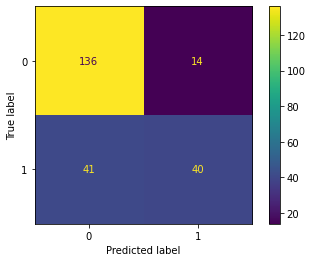

In [24]:
# Make predictions on validation dataset
model = LogisticRegression(random_state = 39)

# model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Logistic Regression")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

Decision Tree
0.670995670995671
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       150
           1       0.54      0.46      0.49        81

    accuracy                           0.67       231
   macro avg       0.63      0.62      0.62       231
weighted avg       0.66      0.67      0.66       231



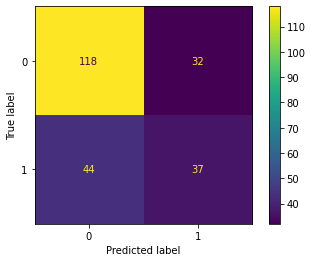

In [25]:
# Make predictions on validation dataset
model = DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                               max_depth = None, min_samples_split = 2, min_samples_leaf = 1)

# model = Decision Tree()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Decision Tree")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

Naive Bayes'
0.7489177489177489
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.66      0.59      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



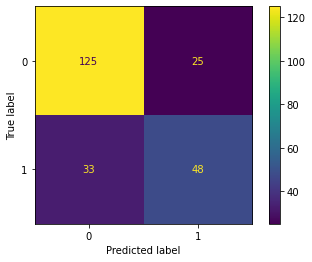

In [26]:
# Make predictions on validation dataset
model = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", algorithm = "auto",
                                leaf_size = 30, p = 2, metric = "minkowski")

# model = NaiveBayes()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Naive Bayes'")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

Logistic Regression before SMOTE
Accuracy Score: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.74      0.49      0.59        81

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231

Area Under Curve: 0.7002469135802468


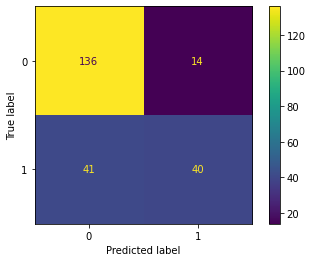

In [27]:
# Define model
logreg1 = LogisticRegression(random_state = 39)

# Fit the model
logreg1.fit(X_train,y_train)

# Test the model
y_pred = logreg1.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg1, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

In [28]:
# Train Dataset balance study
print("Response counts of label '0': {}".format(sum(y_train == 0)/len(y_train == 0)))
print("Response counts of label '1': {}".format(sum(y_train == 1)/len(y_train == 1)))

Response counts of label '0': 0.6517690875232774
Response counts of label '1': 0.34823091247672255


In [29]:
# SMOTE technique for upsampling the minority label (1 in our case) and 
# RandomUnderSampler technique for down-sampling the majority label (0 in our case) 
# will be used to deal with the data imbalance.

smote = SMOTE(sampling_strategy = 'minority')
under_sampling = RandomUnderSampler(sampling_strategy='majority', random_state = 49)

steps = [('o', smote), ('u', under_sampling)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

In [30]:
# Train Dataset balance study
print("Response counts of label '0': {}".format(sum(y_train_res == 0)/len(y_train_res == 0)))
print("Response counts of label '1': {}".format(sum(y_train_res == 1)/len(y_train_res == 1)))

Response counts of label '0': 0.5
Response counts of label '1': 0.5


Logistic Regression before SMOTE
Accuracy Score: 0.7489177489177489
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.64      0.64      0.64        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

Area Under Curve: 0.724320987654321
Recall score: 0.6419753086419753


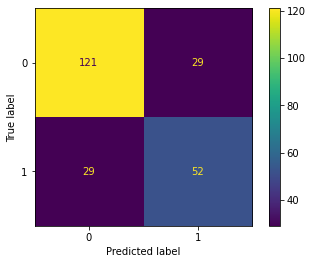

In [31]:
# Assessing the improvement
# Define model
logreg2 = LogisticRegression(random_state = 39)
# Fit the model
logreg2.fit(X_train_res,y_train_res)

# Test the model
y_pred = logreg2.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg2, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

#### Observations and model tuning :-
1. As observed, after the minority upsampling followed by majority downsampling, the model performance has reduced slightly on recall score for 0 class (0.80 from 0.91) and improved slightly for 1 class (0.68 from 0.49). Since, the problem is a medical problem, improving of the recall for "1" class is a good news. 
2. Hyperparameter makes our model more fine-tune the parameters and also we can manually fine-tune our parameters for robust model and can see the difference in importance of using parameters. list of regularization and different penalty parameters will be considered to evaluate the most optimized hyperparameter to identify the improvement opportunity in the model.

In [32]:
# Model fine-tuning
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = logreg2,
                           param_grid = parameters_lr,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train_res, y_train_res)
best_f1_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best f1 score of LR: {:.2f} %".format(best_f1_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best f1 score of LR: 77.28 %
Best Parameter of LR: {'C': 1, 'penalty': 'l2'}


#### Observations and model tuning :-
1. As the best f1-score observed after finetuning is 0.75, we will use this final parameter in the model to understand the complete effectiveness.

Logistic Regression before SMOTE
Accuracy Score: 0.7489177489177489
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       150
           1       0.64      0.67      0.65        81

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

Area Under Curve: 0.73
Recall score: 0.6666666666666666


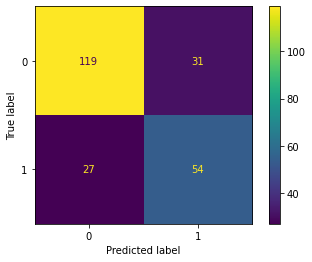

In [33]:
# Assessing the improvement
# Define model
logreg3 = LogisticRegression(C = 100, penalty = 'l2')

# Fit the model
logreg3.fit(X_train_res,y_train_res)

# Test the model
y_pred = logreg3.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg3, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

#### Observations and model tuning :-
1. With the tuned parameter, the model performance has remained same on recall score for 0 class (0.80) and improved improved for 1 class (0.72 from 0.68). Since, the problem is a medical problem, improving of the recall for "1" class is a good news. 

## * Final Interpretation

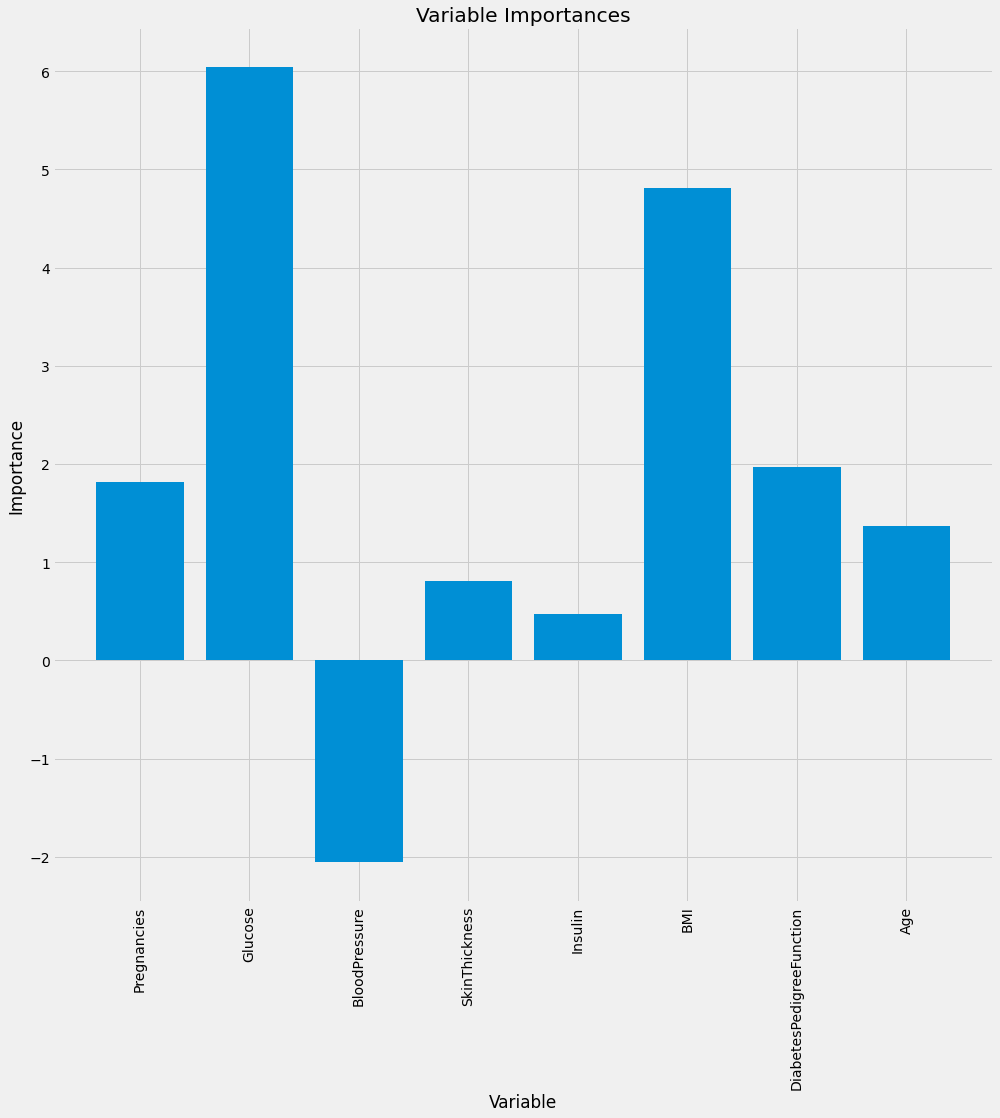

In [34]:
# Plotting the feaature importance to understand the effect
importance = logreg3.coef_[0]

feature_list = list(features.columns)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))

display(HTML('<b>Figure 8: Variable importance plot</b>'))
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [35]:
# Get importance
display(HTML('<b>Table 6: Feature importance based on coef</b>'))
feature_importance = pd.DataFrame({'feature': list(features.columns), 'feature_importance': [abs(i) for i in importance]})
feature_importance.sort_values('feature_importance', ascending = False)

,feature,feature_importance
1,Glucose,6.042835
5,BMI,4.811863
2,BloodPressure,2.056474
6,DiabetesPedigreeFunction,1.973512
0,Pregnancies,1.814367
7,Age,1.365464
3,SkinThickness,0.809801
4,Insulin,0.470905


In [36]:
data_final = pd.DataFrame(X_test, columns=feature_list)

data_final['y_actual'] = pd.DataFrame(y_test)

data_final['y_predicted'] = pd.DataFrame(y_pred)

data_final["id"] = data_final.index


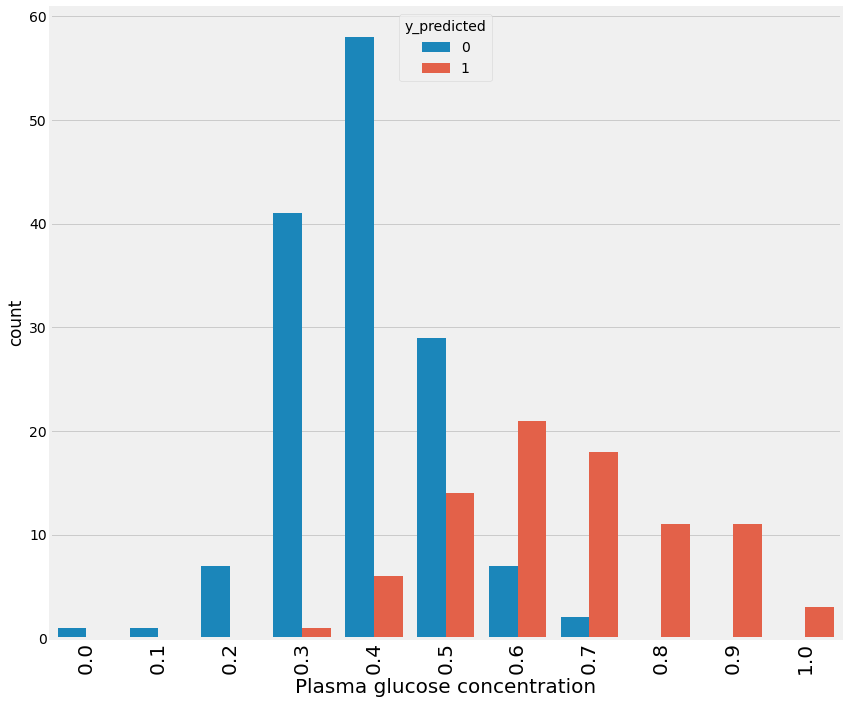

In [37]:
# Counting the entries for top variables against predicted class
display(HTML('<b>Figure 9: Glucose Vs Predicted Class</b>'))
plt.figure(figsize=(12,10), facecolor="white")

sns.countplot(data_final['Glucose'].round(1), hue=data_final["y_predicted"], orient="v")
plt.xlabel('Plasma glucose concentration',fontsize=20)
plt.xticks(rotation=90,
           horizontalalignment='center',
           fontweight='light',
           fontsize='x-large')
plt.tight_layout()

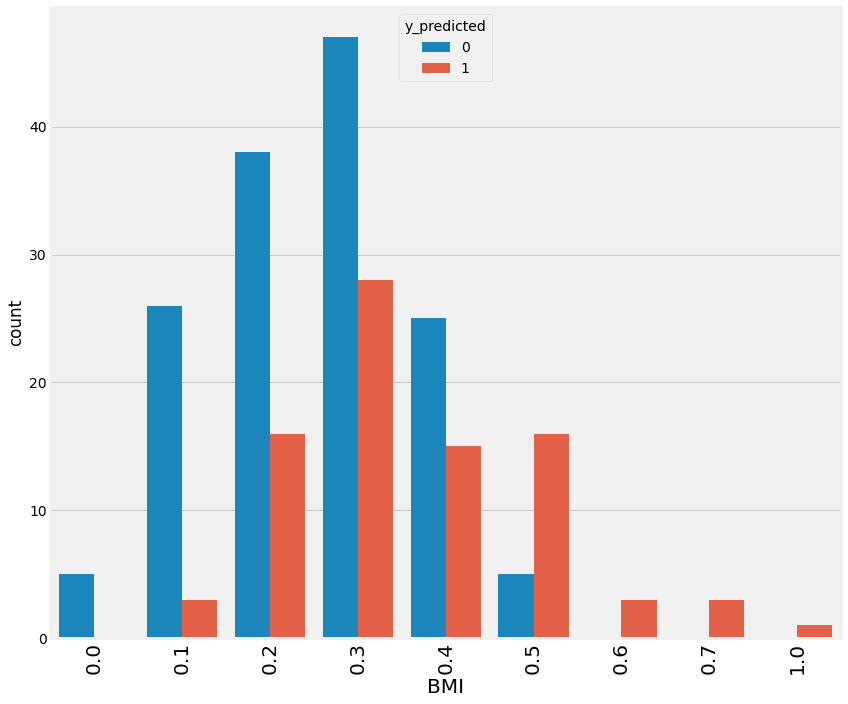

In [38]:
# Counting the entries for top variables against predicted class
display(HTML('<b>Figure 10: BMI Vs Predicted Class</b>'))
plt.figure(figsize=(12,10), facecolor="white")

sns.countplot(data_final['BMI'].round(1), hue=data_final["y_predicted"], orient="v")
plt.xlabel('BMI',fontsize=20)
plt.xticks(rotation=90,
           horizontalalignment='center',
           fontweight='light',
           fontsize='x-large')
plt.tight_layout()

#### Final Observation :-
1. Being highly important with positive trend shows that those with higher observed plasma glucose concentration level tend to be at higher risk of diabetes compared to those with lower glucose level.
2. People with higher BMI level are at higher risk of diabetes.
   